# Automated Data Collection Tool
**Authors:** Unaisa Islam, Dickson Owuor, Daisy Kipto, Raymond Cao

July 2025

## Main Goal

To write a function that will take as input: (1) a CSV file with image filters and (2) microscopy images. The function will apply filters to the images to produce graph images. The images will be later labeled as good/bad in order to be used to train a CNN model to detect/predict good and bad graph images.

### 1. Import Libraries

In [1]:
# Installing Libraries (if not installed)
!pip3 install matplotlib
!pip3 install sgtlib
!pip3 install seaborn
!pip3 install numpy
!pip3 install pandas
!pip3 install sgtlib

In [61]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

from sgtlib import modules as sgt

### 2. Get CSV file and Image Folder

In [4]:
# Read CSV file into a Pandas DataFram

filter_df = pd.read_csv('filters.csv')
filter_df.head()

,file_name,Adaptive Kernel,Global Threshold,OTSU,Dark FG,Autolevel,Gaussian Kernel,Laplacian,Sobel,Median,Scharr,Lowpass Window,Gamma,result
0,ANF copy.jpeg,21.0,NaN,NaN,NaN,7.0,7.0,NaN,NaN,True,NaN,3.0,0.94,G
1,ANF copy.jpeg,23.0,NaN,NaN,NaN,7.0,7.0,NaN,NaN,True,NaN,4.0,0.94,G
2,ANF copy.jpeg,25.0,NaN,NaN,NaN,7.0,7.0,NaN,NaN,True,NaN,3.0,0.97,G
3,ANF copy.jpeg,23.0,NaN,NaN,NaN,7.0,7.0,NaN,NaN,True,NaN,3.0,0.93,G
4,ANF copy.jpeg,11.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,True,NaN,2.0,0.85,B


In [62]:
# Load images folder
data_dir = 'all_images'
os.listdir(data_dir)
print(os.listdir(data_dir))

['4.tif', '4_002.tif', '4_004.tif', 'a (2).jpg', 'a (4).BMP', 'a (5).BMP', 'ANF.jpeg', 'b (12).tif', 'b (14).tif', 'b (5).tif', 'c (1).tif', 'c (3).tif', 'c (6).tif', 'CANF.jpeg', 'CANN.jpeg', 'CCF.jpeg', 'd (2).tif', 'd (4).tif', 'd (6).tif', 'e (10).tif', 'e (4).tif', 'e (6).tif', 'f (3).tif', 'f (4).tif', 'f (7).tif', 'FCF.jpeg', 'h (1).tif', 'h (5).tif', 'h (7).tif', 'i (3).tif', 'i (5).tif', 'i (8).tif', 'j (5).tif', 'j (6).tif', 'j (7).tif', 'rGO.jpeg', 'Sample3 BSE_017 - Small.tif', 'Sample3 BSE_017.tif', 'Sample3 BSE_018 - Small.tif', 'Sample3 SE_InL_002 - Small.tif', 'Sample3 SE_InL_003 - Small.tif', 'Sample6 BSE_010 - Small.tif', 'Sample6 SE_InL_002 - Small.tif', 'Sample6 SE_InL_002.tif', 'Sample6 SE_InL_003 - Small.tif', 'Sample6 SE_InL_006.tif', 'Sample6 SE_InL_007.tif', 'sgt_files']


(664, 912, 3)


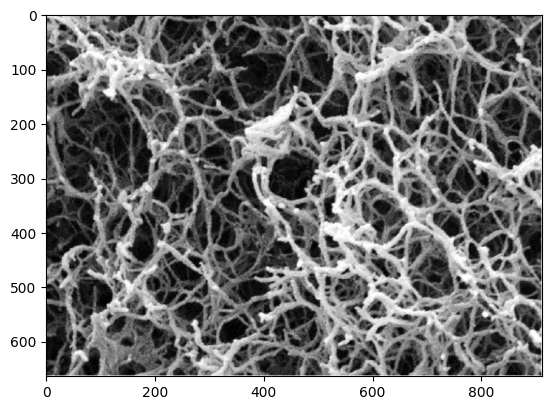

In [6]:
# Check out images

img = mpimg.imread('images/ANF.jpeg')
print(img.shape)
plt.imshow(img)

### 3. Run StructuralGT

* Identify and set paths to image(s) and config file

In [7]:
# set paths
img_path = "images/ANF.jpeg"
cfg_file = "sgt_configs.ini"   # Optional: leave blank

* Define a function that will allow you to receive live updates from StructuralGT (as it is running)

In [9]:
# Define a function for receiving progress updates
def print_updates(progress_val, progress_msg):
    print(f"{progress_val}: {progress_msg}")

* Create an object that will take as input the config file and image and apply image filter

In [10]:
# Create a Network object
ntwk_obj, _ = sgt.ImageProcessor.create_imp_object(img_path)

* Update image filter options

In [11]:
sel_img_batch = ntwk_obj.get_selected_batch()
img_obj = sel_img_batch.images[0]
print(f"Old Threshold Type: {img_obj.configs["threshold_type"]["value"]}")

img_obj.configs["threshold_type"]["value"] = 0
print(f"New Threshold Type: {img_obj.configs["threshold_type"]["value"]}")

Old Threshold Type: 0
New Threshold Type: 0


* Apply image filters according to config file

In [12]:
# Apply image filters according to cfg_file
ntwk_obj.add_listener(print_updates)
ntwk_obj.apply_img_filters()
ntwk_obj.remove_listener(print_updates)

10: Processing image...
99.0: Image processing in progress...
100: Image processing complete...


In [13]:
# Get images
sel_img_batch = ntwk_obj.get_selected_batch()
bin_images = [obj.img_bin for obj in sel_img_batch.images]
mod_images = [obj.img_mod for obj in sel_img_batch.images]

Text(0.5, 1.0, 'Binary Image')

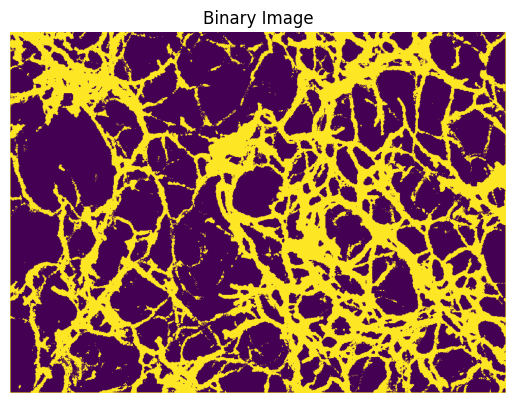

In [24]:
# View images
plt.imshow(bin_images[0])
plt.axis('off')  # Optional: Turn off axis ticks and labels for a cleaner image display
plt.title('Binary Image')
plt.show()

* Extract the graph

In [75]:
# Extract graph
ntwk_obj.add_listener(print_updates)
ntwk_obj.build_graph_network()
ntwk_obj.remove_listener(print_updates)

0: Starting graph extraction...
50: Extracting the graph network...
51: Build graph skeleton from binary image...
52: Ran merge_nodes for image skeleton...
54: Ran remove_small_objects for image skeleton...
56: Ran prune_dangling_edges for image skeleton...
60: Creating graph network...
64: Removing self loops from graph network...
66: Assigning weights to graph network...
75: Verifying graph network...
77: Retrieving graph properties...
78: Identifying graph subcomponents...
80: Storing graph properties...
90: Saving graph network...
95: Plotting graph network...


* View the graph image

Exception ignored in: 'zmq.backend.cython._zmq.Frame.__del__'
Traceback (most recent call last):
  File "_zmq.py", line 160, in zmq.backend.cython._zmq._check_rc
KeyboardInterrupt: 


TypeError: Image data of dtype object cannot be converted to float

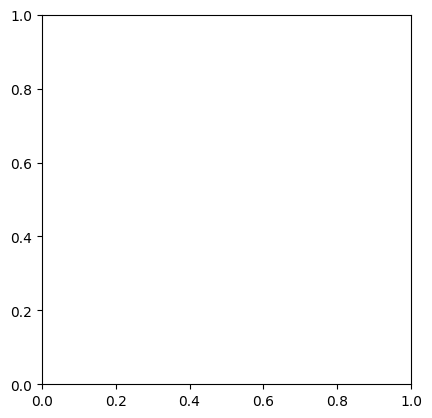

In [17]:
# View graph
net_images = [sel_img_batch.graph_obj.img_ntwk]
plt.imshow(net_images[0])
plt.axis('off')  # Optional: Turn off axis ticks and labels for a cleaner image display
plt.title('Graph Image')
plt.show()

In [ ]:

# def automated_graph_generator():
    
    # identify an image folder
    # Run 1, 2, 3 in a loop (if we want 10k images, then the loop should repeat itself 10k times)
    # 1. randomly come with image filters
    # 2. apply them to all images
    # 3. save the graph images (with unique names) and the randomly selected filters (used to generate that graph - in CVS file with the file name of the graph image)
    # pass


In [36]:
import csv
import random
def generate_randfilt(file):
    settings = {
        "file": file,
        "threshold_type": random.randint(0, 2),
        "global_threshold_value": random.randint(1, 255),
        "adaptive_local_threshold_value": random.randint(1, 999),
        "adjust_gamma": random.uniform(0.01, 5.0),
        "blurring_window_size": random.randrange(3, 14, 2),      
        "apply_autolevel":           random.randrange(1, 8, 2),      
        "apply_laplacian_gradient":  random.randrange(1, 8, 2),
        "apply_scharr_gradient": random.randint(1, 2),
        "apply_sobel_gradient":      random.randrange(1, 8, 2),
        "apply_median_filter":       random.randint(0, 1),
        "apply_gaussian_blur":       random.randrange(1, 8, 2),
        "apply_lowpass_filter":      random.randint(1, 999),
        "apply_dark_foreground":     random.randint(0, 1),
        "contrast_level":            random.randint(-100, 100),
    }
    return settings



In [31]:
def export_csv(settings, filename='filter_log.csv'):
    file_exists = os.path.isfile(filename)
    with open(filename, mode='a', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=settings.keys())
        if not file_exists:
            writer.writeheader()
        writer.writerow(settings)

In [ ]:
#extra function just to see if a folder is valid to use
# def process_folder(folder_path):
#     if os.path.isdir(folder_path):
#         print(f"Processing files in: {folder_path}")
#         for filename in os.listdir(folder_path):
#             file_path = os.path.join(folder_path, filename)
#             if os.path.isfile(file_path):
#                 print(f"Found file: {file_path}")
#     else:
#         print(f"Error: '{folder_path}' is not a valid directory.")

In [ ]:
# (unfinished) other method where the user can manually select the folder from their file system

# !pip install ipyfilechooser
# from ipyfilechooser import FileChooser
# from IPython.display import display
# def automated_graph_generator():
#     fc = FileChooser()
#     display(fc)
#     input=fc.selected
#     graphs="exported_graphs",
#     filter_csv="filter_combolog.csv"
#     for img in input:
#         if img.endswith((".tif", ".jpg", ".BMP", ".jpeg")):
#             generate_randfilt(img)
#             ntwk_obj, _ = sgt.ImageProcessor.create_imp_object(img_path, config_file=settings)
#             ntwk_obj.add_listener(print_updates)
#             ntwk_obj.apply_img_filters()
#             ntwk_obj.build_graph_network()
#             ntwk_obj.remove_listener(print_updates)
#             compute_obj = sgt.GraphAnalyzer(ntwk_obj)
#             sgt.GraphAnalyzer.safe_run_analyzer(compute_obj, print_updates)
#             sgt.GraphAnalyzer.write_to_pdf(compute_obj)
#         else:
#             continue

In [76]:
# this part works!

import os

def automated_graph_generator(source_folder, export_folder):
    for file in os.listdir(source_folder):
        full_path = os.path.join(source_folder, file)
        def generate_randfilt(file):
            settings = {
                "file": file,
                "threshold_type": random.randint(0, 2),
                "global_threshold_value": random.randint(1, 255),
                "adaptive_local_threshold_value": random.randint(1, 999),
                "adjust_gamma": random.uniform(0.01, 5.0),
                "blurring_window_size": random.randrange(3, 14, 2),      
                "apply_autolevel":           random.randrange(1, 8, 2),      
                "apply_laplacian_gradient":  random.randrange(1, 8, 2),
                "apply_scharr_gradient": random.randint(1, 2),
                "apply_sobel_gradient":      random.randrange(1, 8, 2),
                "apply_median_filter":       random.randint(0, 1),
                "apply_gaussian_blur":       random.randrange(1, 8, 2),
                "apply_lowpass_filter":      random.randint(1, 999),
                "apply_dark_foreground":     random.randint(0, 1),
                "contrast_level":            random.randint(-100, 100),
            }
            return settings
    for file in os.listdir(source_folder):
        full_path = os.path.join(source_folder, file)
        def export_csv(settings, filename='filter_log.csv'):
            file_exists = os.path.isfile(filename)
            with open(filename, mode='a', newline='') as file:
                writer = csv.DictWriter(file, fieldnames=settings.keys())
                if not file_exists:
                    writer.writeheader()
                writer.writerow(settings)
        if file.lower().endswith((".tif", ".jpg", ".bmp", ".jpeg", ".png")):
            source_path = os.path.join(source_folder, file)
            export_path = os.path.join(export_folder, file)
            if not os.path.exists(export_folder):
                os.makedirs(export_folder)
            try:
                settings = generate_randfilt(file)
                
                export_csv(settings)

            except Exception as e:
                print(f"Error processing {file}: {e}")

In [73]:
# this doesn't work because of some error with the generation (need help)
#  took out defining the functions inside the loop to make it easier to read and catch the error, will replace once fixed
import os

def automated_graph_generator(source_folder, export_folder):
    for file in os.listdir(source_folder):
        full_path = os.path.join(source_folder, file)
        if file.lower().endswith((".tif", ".jpg", ".bmp", ".jpeg", ".png")):
            source_path = os.path.join(source_folder, file)
            export_path = os.path.join(export_folder, file)
            if not os.path.exists(export_folder):
                os.makedirs(export_folder)
            try:
                settings = generate_randfilt(file)
                ntwk_obj, _ = sgt.ImageProcessor.create_imp_object(full_path, config_file=settings)
                ntwk_obj.add_listener(print_updates)
                ntwk_obj.apply_img_filters()
                nonlocalntwk_obj.build_graph_network()
                compute_obj = sgt.GraphAnalyzer(ntwk_obj)
                sgt.GraphAnalyzer.safe_run_analyzer(compute_obj, print_updates)
                sgt.GraphAnalyzer.write_to_pdf(compute_obj)
                sel_img_batch = ntwk_obj.get_selected_batch()
                bin_images = [obj.img_bin for obj in sel_img_batch.images]
                mod_images = [obj.img_mod for obj in sel_img_batch.images]
                bin_images.save(export_path.replace('.jpg', '_mod.jpg').replace('.png', '_mod.png').replace('.jpeg', '_mod.jpeg').replace('.bmp', '_mod.bmp').replace('.tif', '_mod.tif'))
                mod_images.save(export_path.replace('.jpg', '_mod.jpg').replace('.png', '_mod.png').replace('.jpeg', '_mod.jpeg').replace('.bmp', '_mod.bmp').replace('.tif', '_mod.tif'))
                print(f"Processed and saved: {file}")
                export_csv(settings)
                ntwk_obj.remove_listener(print_updates)

            except Exception as e:
                print(f"Error processing {file}: {e}")

In [ ]:
# tried to make it specific to our folders
# export_folder = 'exported_graphs'
# def automated_graph_generator():
#     for file in os.listdir(data_dir):
#         full_path = os.path.join(data_dir, file)
#         if file.lower().endswith((".tif", ".jpg", ".bmp", ".jpeg", ".png")):
#             source_path = os.path.join(data_dir, file)
#             export_path = os.path.join(export_folder, file)
#             if not os.path.exists(export_folder):
#                 os.makedirs(export_folder)
#             try:
#                 settings = generate_randfilt(file)
#                 ntwk_obj, _ = sgt.ImageProcessor.create_imp_object(full_path, config_file=settings)
#                 ntwk_obj.add_listener(print_updates)
#                 ntwk_obj.apply_img_filters()
#                 nonlocalntwk_obj.build_graph_network()
#                 ntwk_obj.remove_listener(print_updates)
#                 compute_obj = sgt.GraphAnalyzer(ntwk_obj)
#                 sgt.GraphAnalyzer.safe_run_analyzer(compute_obj, print_updates)
#                 sgt.GraphAnalyzer.write_to_pdf(compute_obj)
#                 sel_img_batch = ntwk_obj.get_selected_batch()
#                 bin_images = [obj.img_bin for obj in sel_img_batch.images]
#                 mod_images = [obj.img_mod for obj in sel_img_batch.images]
#                 bin_images.save(export_path.replace('.jpg', '_mod.jpg'))
#                 mod_images.save(export_path.replace('.jpg', '_mod.jpg'))
#                 print(f"Processed and saved: {file}")
#                 export_csv(settings)

#             except Exception as e:
#                 print(f"Error processing {file}: {e}")

In [ ]:
# process_folder('all_images')

In [74]:
automated_graph_generator('all_images', 'exported_graphs')

--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\stude\anaconda3\envs\sgt-v02\Lib\site-packages\sgtlib\imaging\image_processor.py", line 143, in _load_img_from_file
    img_batch_groups = ImageProcessor.create_img_batch_groups(image_groups, self.config_file,
                                                              self.auto_scale)
  File "c:\Users\stude\anaconda3\envs\sgt-v02\Lib\site-packages\sgtlib\imaging\image_processor.py", line 725, in create_img_batch_groups
    graph_obj=FiberNetworkBuilder(cfg_file=cfg_file)
  File "c:\Users\stude\anaconda3\envs\sgt-v02\Lib\site-packages\sgtlib\networks\fiber_network.py", line 41, in __init__
    self.configs: dict = load_gte_configs(cfg_file)  # graph extraction parameters and options.
                         ~~~~~~~~~~~~~~~~^^^^^^^^^^
  File "c:\Users\stude\anaconda3\envs\sgt-v02\Lib\site-packages\sgtlib\utils\config_loader.py", line 166, in load_gte_configs
    config = read_config_file(cfg_path)
  File "c:\Us

Error processing 4.tif: object of type 'NoneType' has no len()
Error processing 4_002.tif: object of type 'NoneType' has no len()
Error processing 4_004.tif: object of type 'NoneType' has no len()
Error processing a (2).jpg: object of type 'NoneType' has no len()
Error processing a (4).BMP: object of type 'NoneType' has no len()
Error processing a (5).BMP: object of type 'NoneType' has no len()
Error processing ANF.jpeg: object of type 'NoneType' has no len()
Error processing b (12).tif: object of type 'NoneType' has no len()
Error processing b (14).tif: object of type 'NoneType' has no len()
Error processing b (5).tif: object of type 'NoneType' has no len()
Error processing c (1).tif: object of type 'NoneType' has no len()


--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\stude\anaconda3\envs\sgt-v02\Lib\site-packages\sgtlib\imaging\image_processor.py", line 143, in _load_img_from_file
    img_batch_groups = ImageProcessor.create_img_batch_groups(image_groups, self.config_file,
                                                              self.auto_scale)
  File "c:\Users\stude\anaconda3\envs\sgt-v02\Lib\site-packages\sgtlib\imaging\image_processor.py", line 725, in create_img_batch_groups
    graph_obj=FiberNetworkBuilder(cfg_file=cfg_file)
  File "c:\Users\stude\anaconda3\envs\sgt-v02\Lib\site-packages\sgtlib\networks\fiber_network.py", line 41, in __init__
    self.configs: dict = load_gte_configs(cfg_file)  # graph extraction parameters and options.
                         ~~~~~~~~~~~~~~~~^^^^^^^^^^
  File "c:\Users\stude\anaconda3\envs\sgt-v02\Lib\site-packages\sgtlib\utils\config_loader.py", line 166, in load_gte_configs
    config = read_config_file(cfg_path)
  File "c:\Us

Error processing c (3).tif: object of type 'NoneType' has no len()
Error processing c (6).tif: object of type 'NoneType' has no len()
Error processing CANF.jpeg: object of type 'NoneType' has no len()
Error processing CANN.jpeg: object of type 'NoneType' has no len()
Error processing CCF.jpeg: object of type 'NoneType' has no len()
Error processing d (2).tif: object of type 'NoneType' has no len()
Error processing d (4).tif: object of type 'NoneType' has no len()
Error processing d (6).tif: object of type 'NoneType' has no len()
Error processing e (10).tif: object of type 'NoneType' has no len()
Error processing e (4).tif: object of type 'NoneType' has no len()
Error processing e (6).tif: object of type 'NoneType' has no len()


--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\stude\anaconda3\envs\sgt-v02\Lib\site-packages\sgtlib\imaging\image_processor.py", line 143, in _load_img_from_file
    img_batch_groups = ImageProcessor.create_img_batch_groups(image_groups, self.config_file,
                                                              self.auto_scale)
  File "c:\Users\stude\anaconda3\envs\sgt-v02\Lib\site-packages\sgtlib\imaging\image_processor.py", line 725, in create_img_batch_groups
    graph_obj=FiberNetworkBuilder(cfg_file=cfg_file)
  File "c:\Users\stude\anaconda3\envs\sgt-v02\Lib\site-packages\sgtlib\networks\fiber_network.py", line 41, in __init__
    self.configs: dict = load_gte_configs(cfg_file)  # graph extraction parameters and options.
                         ~~~~~~~~~~~~~~~~^^^^^^^^^^
  File "c:\Users\stude\anaconda3\envs\sgt-v02\Lib\site-packages\sgtlib\utils\config_loader.py", line 166, in load_gte_configs
    config = read_config_file(cfg_path)
  File "c:\Us

Error processing f (3).tif: object of type 'NoneType' has no len()
Error processing f (4).tif: object of type 'NoneType' has no len()
Error processing f (7).tif: object of type 'NoneType' has no len()
Error processing FCF.jpeg: object of type 'NoneType' has no len()
Error processing h (1).tif: object of type 'NoneType' has no len()
Error processing h (5).tif: object of type 'NoneType' has no len()
Error processing h (7).tif: object of type 'NoneType' has no len()
Error processing i (3).tif: object of type 'NoneType' has no len()
Error processing i (5).tif: object of type 'NoneType' has no len()
Error processing i (8).tif: object of type 'NoneType' has no len()


--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\stude\anaconda3\envs\sgt-v02\Lib\site-packages\sgtlib\imaging\image_processor.py", line 143, in _load_img_from_file
    img_batch_groups = ImageProcessor.create_img_batch_groups(image_groups, self.config_file,
                                                              self.auto_scale)
  File "c:\Users\stude\anaconda3\envs\sgt-v02\Lib\site-packages\sgtlib\imaging\image_processor.py", line 725, in create_img_batch_groups
    graph_obj=FiberNetworkBuilder(cfg_file=cfg_file)
  File "c:\Users\stude\anaconda3\envs\sgt-v02\Lib\site-packages\sgtlib\networks\fiber_network.py", line 41, in __init__
    self.configs: dict = load_gte_configs(cfg_file)  # graph extraction parameters and options.
                         ~~~~~~~~~~~~~~~~^^^^^^^^^^
  File "c:\Users\stude\anaconda3\envs\sgt-v02\Lib\site-packages\sgtlib\utils\config_loader.py", line 166, in load_gte_configs
    config = read_config_file(cfg_path)
  File "c:\Us

Error processing j (5).tif: object of type 'NoneType' has no len()
Error processing j (6).tif: object of type 'NoneType' has no len()
Error processing j (7).tif: object of type 'NoneType' has no len()
Error processing rGO.jpeg: object of type 'NoneType' has no len()
Error processing Sample3 BSE_017 - Small.tif: object of type 'NoneType' has no len()
Error processing Sample3 BSE_017.tif: object of type 'NoneType' has no len()
Error processing Sample3 BSE_018 - Small.tif: object of type 'NoneType' has no len()
Error processing Sample3 SE_InL_002 - Small.tif: object of type 'NoneType' has no len()
Error processing Sample3 SE_InL_003 - Small.tif: object of type 'NoneType' has no len()
Error processing Sample6 BSE_010 - Small.tif: object of type 'NoneType' has no len()
Error processing Sample6 SE_InL_002 - Small.tif: object of type 'NoneType' has no len()
Error processing Sample6 SE_InL_002.tif: object of type 'NoneType' has no len()
Error processing Sample6 SE_InL_003 - Small.tif: object o

--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\stude\anaconda3\envs\sgt-v02\Lib\site-packages\sgtlib\imaging\image_processor.py", line 143, in _load_img_from_file
    img_batch_groups = ImageProcessor.create_img_batch_groups(image_groups, self.config_file,
                                                              self.auto_scale)
  File "c:\Users\stude\anaconda3\envs\sgt-v02\Lib\site-packages\sgtlib\imaging\image_processor.py", line 725, in create_img_batch_groups
    graph_obj=FiberNetworkBuilder(cfg_file=cfg_file)
  File "c:\Users\stude\anaconda3\envs\sgt-v02\Lib\site-packages\sgtlib\networks\fiber_network.py", line 41, in __init__
    self.configs: dict = load_gte_configs(cfg_file)  # graph extraction parameters and options.
                         ~~~~~~~~~~~~~~~~^^^^^^^^^^
  File "c:\Users\stude\anaconda3\envs\sgt-v02\Lib\site-packages\sgtlib\utils\config_loader.py", line 166, in load_gte_configs
    config = read_config_file(cfg_path)
  File "c:\Us